# **Corona Detection from Symptoms**

# **<font color='darkblue'> 1. Get the Machine Ready </font>**

**Import libraries for dataset preparation, feature engineering, model training (Numpy, Scikit-learn)**

We will build a simple Multi Layer Network with multiple hidden layers and one output layer. Before writing all the math functions required let’s import every module we’re gonna use in this project.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from urllib.request import urlopen, Request
import csv

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

import matplotlib.pyplot as plt
import plotly.graph_objects as go

# **<font color='darkblue'> 2. Initialize Variables </font>**

These are the global variables that have been initialized here.

In [ ]:
max_data = 1000

# ----- For MLNN -----
epoch_mlnn = 30000
alpha_mlnn = 0.05

Few Test finding:

*   data: 2000, epoch: 85000, alpha: .33,     78%
*   data: 5000, epoch: 30000, alpha: .0043,    100%
*   data: 20000, epoch: 30000, alpha: .0013,    100%
*   data: 30000, epoch: 10000, alpha: .0015,    100%





Taking Sample inputs with 09 symptoms

In [ ]:
symptoms_name=["Fever","Tiredness","Dry-Cough","Difficulty-in-Breathing","Sore-Throat","Pains","Nasal-Congestion","Runny-Nose","Diarrhea"]
user_input=[]
user_input.append([0, 0, 0, 0, 0, 0, 0, 0, 0])
user_input.append([1, 1, 1, 1, 1, 1, 1, 1, 1])
user_input.append([1, 0, 1, 1, 0, 0, 1, 1, 1])
user_input.append([1, 1, 1, 1, 1, 0, 1, 1, 1])
user_input.append([1, 1, 1, 0, 0, 0, 0, 0, 1])

# **<font color='darkblue'> 3. Prepare Dataset </font>**


### **<font color='mediumblue'> 3.1 Load Dataset </font>**

**Dataset Source:** https://www.kaggle.com/iamhungundji/covid19-symptoms-checker

In [ ]:
# Data Load from Source
symptoms, labels = [], []
data = urlopen('https://raw.githubusercontent.com/ranadepto/corona/master/Cleaned-Data.csv').read().decode('utf8').split("\n")
csvreader = csv.reader(data)
next(csvreader)

none_data, severe_data, total_data = 0, 0, 0

# Filter data from main dataset, considering 09 symptoms and taking only two types of severity (None, Severe)
for i, line in enumerate(csvreader):
    if (total_data==max_data):
        break

    '''
      line[19]=Severity_Mild, line[20]=Severity_Moderate, line[21]=Severity_None, line[22]=Severity_Severe
    '''

    symtoms_count=0;
    considered_symptoms = line[0:5] + line[6:10]  # ignoring the attribute none_sympton at line[5]
    for number in considered_symptoms:
        symtoms_count+=int(number)
    # print(symtoms_count,"\n")

    # Filter Data
    add_data = True
    if(line[21]=='1' and symtoms_count<5 and (none_data/max_data)<.50):
        none_data+=1
    elif(line[22]=='1' and symtoms_count>5 and (severe_data/max_data)<.50):
        severe_data+=1
    else:
        add_data = False

    if(add_data):
        total_data+=1
        labels.append(line[21])
        symptoms.append(considered_symptoms)

print("none: ", none_data, "\tsevere: ", severe_data)
print("Total data: ", len(symptoms))
print("Labels", labels)
print(len(labels))

none:  500 	severe:  500
Total data:  1000
Labels ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',

In [ ]:
# For Testing Purpose
for i in range(9): 
    print(symptoms[i], " | Labels ->", labels[i]) 

['1', '1', '1', '1', '1', '1', '1', '1', '1']  | Labels -> 0
['1', '1', '1', '1', '1', '1', '1', '1', '1']  | Labels -> 0
['1', '1', '1', '1', '1', '1', '1', '1', '1']  | Labels -> 0
['1', '1', '1', '1', '1', '1', '1', '1', '0']  | Labels -> 0
['1', '1', '1', '1', '1', '1', '1', '1', '0']  | Labels -> 0
['1', '1', '1', '1', '1', '1', '1', '1', '0']  | Labels -> 0
['1', '1', '1', '1', '1', '1', '1', '0', '0']  | Labels -> 0
['1', '1', '1', '1', '1', '1', '1', '0', '0']  | Labels -> 0
['1', '1', '1', '1', '1', '1', '1', '0', '0']  | Labels -> 0


### **<font color='mediumblue'> 3.2 Train Test Split </font>**

Split the dataset to 80% training set and 20% validation/testing set.

In [ ]:
symptoms_array=np.array(symptoms) 
labels_array=np.array(labels)

X,Xt,y,yt=train_test_split(symptoms_array.astype(np.int),labels_array.astype(np.int),test_size=0.2,random_state=0)

# **<font color='darkblue'> 4. Multi Layer Neural Network </font>**

### **<font color='mediumblue'> 4.1 Create Network (MLNN) </font>**

#### **Initialize Weights:**

init() function will be used to create weight vectors depending on the number of neurons in the adjacent layers. We can initialise every weight with zero or lower values, which results in network having too little signals to work with. In the case of bigger values, it becomes too cumbersome for the network to deal with.

So, initializing weights should always depend on the values your activation function uses to send signals through your network. The simple solution is that to initialize them with vectors having zero mean and one standard deviation, which statistically is normal distribution, as you can see in our code with randn() function. As the neuron in the adjacent layer receives values from all the neurons in the previous layer, they need to be rescaled with respect to the number of neurons in the input layer or the previous layer.

In [ ]:
def init(inp,out):
    return np.random.randn(inp,out)/np.sqrt(inp)

#### **Create Architecture:**

create_arch_mlnn() function takes layers as an input and creates a fully 
connected neural network by initializing the link weights between neurons using our init() function.







In [ ]:
def create_arch_mlnn(input_layer,first_layer,output_layer,random_seed=0):
    np.random.seed(random_seed)
    layers=X.shape[1],first_layer,1
    arch=list(zip(layers[:-1],layers[1:]))
    weights=[init(inp,out) for inp,out in arch]
    return weights

#### **Activation Function:**

Now that we have the architecture ready, we need to decide on the activation function which is used to fire a neuron. Here, we have applied activation functions:

*   "sigmoid": it outputs between 0~1
*   "softmax": it outputs between 0~1

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(s):
    return s*(1-s)

def softmax(scores):
    exp = np.exp(scores)
    scores = exp / np.sum(exp)
    return scores

In [ ]:
print("\n sigmoid:")
print(sigmoid(17))
print(sigmoid(18))
print(sigmoid(0))
print(sigmoid(-5))

print("\n sigmoid_derivative:")
print(sigmoid_derivative(17))
print(sigmoid_derivative(18))
print(sigmoid_derivative(0))
print(sigmoid_derivative(-5))

print("\n softmax:")
print(softmax(17))
print(softmax(18))
print(softmax(0))
print(softmax(-25))


 sigmoid:
0.9999999586006244
0.9999999847700205
0.5
0.0066928509242848554

 sigmoid_derivative:
-272
-306
0
-30

 softmax:
1.0
1.0
1.0
1.0


#### **Feed Forward Network**

We are all set to create a feed forward network with everything we have until now. In a feed forward network, we will multiply the input values with the weight vector and pass it to the activation function and return the output of the function.

In [ ]:
def feed_forward(X,weights):
    a=X.copy()
    out=list()
    for w in weights:
        z=np.dot(a,w)
        a=sigmoid(z)
        out.append(a)
    return out

#### **Back Propagation**

Having a feed forward network will not help us in most of the cases, as we need to update the weights of our network in case of any error in the output while training.

In [ ]:
def backpropagation(l1,l2,weights,y):
    l2_error=y.reshape(-1,1)-l2
    l2_delta=l2_error*sigmoid_derivative(l2)
    l1_error=l2_delta.dot(weights[1].T)
    l1_delta=l1_error*sigmoid_derivative(l1)
    return l2_error,l1_delta,l2_delta

l1,l2 represent the two hidden layers in our network and l1_error and l2_error are errors associated with each layer. l1_delta and l2_delta is the correction to the error in our network weights.

#### **Updation of weights**

Now that we know the error in our network, we need to update our weights accordingly.

Here, alpha represents the learning rate which describes how fast or slow your network should learn. The value of alpha plays a key role to build an efficient neural network. A too big value for alpha makes your model skip through many local minima and more often global minima too. In the same way, having a too low value will take your network forever to learn. Normally, the learning rate will be a bit high in the initial epochs ( number of times you train the network ), as the accuracy increases we reduce the alpha value to better converge to the global minima.

In [ ]:
def update_weights(X,l1,l1_delta,l2_delta,weights,alpha=.5):
    weights[1]+=(alpha*l1.T.dot(l2_delta))
    weights[0]+=(alpha*X.T.dot(l1_delta))
    return weights

#### **Prediction using our network**

We will predict the output of our network using the trained weights and our feed forward network.

Our feed forward network returns the data point and the probability associated with it. As we are dealing with the corona data, to predict to which of the either corona effected or not, we set a threshold of 0.5 which means anything above 0.5 will be considered as a point in corona effected and all others in not effected.

In [ ]:
def predict_mlnn(X,weights):
    _,l2=feed_forward(X,weights)
    preds=np.ravel((l2>0.5).astype(int))
    return preds

def predictRegression_mlnn(X,weights):
    _,l2=feed_forward(X,weights)
    return np.round(100.0-(l2*100.0),2)


#### **Train The Multilayer Neural Network (MLNN)**

In the first line we created architecture with three nodes in the hidden layer as we have data represented in 3 dimensions. Our input layer is fed with X and output layer has one neuron to output the probability of the data point belonging to either of the moons.

We will train our data with 30000 epochs and then perform Back Propagation to train our model. We output the train accuracy and test accuracy of our model after every 5000 iterations.

The more the test accuracy, the more efficient our model is. We should have a look on the train accuracy too, to check whether our model is overfitted or not. Yeah, we have built a simple Multi Layer Neural Network with two hidden layers and one output layer.

In [ ]:
def train_model_mlnn(X_train, Y_train, X_test, Y_test, print_epoch):
  weights=create_arch_mlnn(X_train,3,1)
  for j in range(epoch_mlnn+1):
    l1,l2=feed_forward(X_train,weights)
    l2_error,l1_delta,l2_delta=backpropagation(l1,l2,weights,Y_train)
    weights=update_weights(X_train,l1,l1_delta,l2_delta,weights,alpha_mlnn)
    if(j%5000==0):
        train_error=np.mean(np.abs(l2_error))
        train_accuracy=accuracy_score(Y_train,(l2>0.5))
        test_preds=predict_mlnn(X_test,weights)
        test_accuracy=accuracy_score(Y_test,test_preds)

        if(print_epoch == True):
          print("epoch {:5} ".format(j),end='-')
          print(' error:{:0.4f} '.format(train_error),end='-')
          print(" acc:train {:0.2f} ".format(train_accuracy),end="|")
          print(" test {:0.2f} ".format(test_accuracy))
  return test_preds, weights

### **<font color='mediumblue'> 4.2 Execute MLNN </font>**

As we have all the functions ready, let’s train our network using the COVID-19 data and display accuracy along with prediction.

In [ ]:
def execute_mlnn_model():
  print('\n\033[1m\033[94m Multi Layer Neural Network: Accuracy \033[0m\n')

  # Train MLNN Model
  prediction, weights = train_model_mlnn(X, y, Xt, yt, print_epoch=True)

  # Predict with Sample Input
  print('\n\033[1m\033[94m Multi Layer Neural Network: Prediction (+ve %) \033[0m\n')
  print("Input Symptoms:\n", symptoms_name)
  for input in user_input:
      print("\nInput", input, " | Predicted: ", predictRegression_mlnn(input, weights))

# Execution Starts from here
execute_mlnn_model()


 Multi Layer Neural Network: Accuracy 

epoch     0 - error:0.4968 - acc:train 0.51 | test 0.54 
epoch  5000 - error:0.0091 - acc:train 1.00 | test 1.00 
epoch 10000 - error:0.0062 - acc:train 1.00 | test 1.00 
epoch 15000 - error:0.0051 - acc:train 1.00 | test 1.00 
epoch 20000 - error:0.0043 - acc:train 1.00 | test 1.00 
epoch 25000 - error:0.0039 - acc:train 1.00 | test 1.00 
epoch 30000 - error:0.0035 - acc:train 1.00 | test 1.00 

 Multi Layer Neural Network: Prediction (+ve %) 

Input Symptoms:
 ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea']

Input [0, 0, 0, 0, 0, 0, 0, 0, 0]  | Predicted:  [0.]

Input [1, 1, 1, 1, 1, 1, 1, 1, 1]  | Predicted:  [100.]

Input [1, 0, 1, 1, 0, 0, 1, 1, 1]  | Predicted:  [0.25]

Input [1, 1, 1, 1, 1, 0, 1, 1, 1]  | Predicted:  [100.]

Input [1, 1, 1, 0, 0, 0, 0, 0, 1]  | Predicted:  [1.34]


# **<font color='darkblue'> 5. Other Algorithms </font>**

Besides MLNN, we have also applied below algorithms into our dataset for Covid-19 detection.


*   Linear Regression
*   KNN
*   SVM
*   Logistic Regression
*   Bagging (Random Forest)
*   Boosting (XGB Classifier)
*   Naive Bayes



### **<font color='mediumblue'> 5.1 Create Models </font>**

Training Models and associate utility variables, functions are implemented in this section.

#### **Utility Components**

Utility variables initialized to keep the Accuracy for each model and Results of Sample outputs.


*   ***Initialize Global Variables:*** Global variables used in computing result for all other algorithms in Section-5



In [ ]:
models_name = ["Linear Regression", "KNN", "SVM", "Logistic Regression", "Bagging (Random Forest)", "Boosting (XGB Classifier)", "Naive Bayes"]
models_accuracy = []

# These are row-column of Result Table for Sample Input
user_input_result_col = ["User Input", "Linear Regression", "KNN", "SVM", "Logistic Regression", "Bagging (Random Forest)", "Boosting (XGB Classifier)", "Naive Bayes"]
user_input_result_val = []

*   ***display_result_in_table():*** Print the result in table format

In [ ]:
# Print results into Tabulate format
def display_result_in_table():
    print('\n\033[1m\033[94m Accuracy Of Other Models: \033[0m\n')
    fig = go.Figure(data=[go.Table(name='Accuracy', 
                                   header=dict(values=models_name, line_color='darkslategray', fill_color='royalblue',
                                            align=['center','center'],font=dict(color='white', size=14), height=35),
                                  cells=dict(values=models_accuracy, line_color='darkslategray', fill_color='white',
                                             align=['center', 'center'], font_size=13, height=30))])
    
    fig.update_layout(width=1300, height=100, margin=dict(r=5, l=5, t=5, b=5))
    fig.show()

    print('\n\033[1m\033[94m Predicted Result for Sample Input Of Other Models: \033[0m\n')
    fig = go.Figure(data=[go.Table(header=dict(values=user_input_result_col, line_color='darkslategray', fill_color='royalblue',
                                            align=['center','center'],font=dict(color='white', size=14), height=35),
                                  cells=dict(values=user_input_result_val, line_color='darkslategray', fill_color='white',
                                             align=['center', 'center'], font_size=13, height=30))])
    fig.update_layout(width=1300, height=250, margin=dict(r=5, l=5, t=5, b=5))
    fig.show()

*   ***prepare_result_to_display():*** Update/add data of utility variables (accuracy value, result of sample input)

In [ ]:
def prepare_result_to_display(model, accuracy, user_input_preds):
    print( model, ": ", accuracy)
    models_accuracy.append(accuracy)
    user_input_result_val.append(user_input_preds)

#### **Train Linear Regression**

In [ ]:
def train_model_linear_regression(feature_train, label, feature_test, test_label):
  model=LinearRegression() 
  model.fit(feature_train, label)

  train_accuracy=accuracy_score(label,(model.predict(feature_train)>0.5))
  test_preds=model.predict(feature_test)>0.5
  test_accuracy=accuracy_score(test_label,test_preds>0.5)
  # print("\nacc:train {:0.2f} ".format(train_accuracy),end="|")
  # print(" test {:0.2f} \n\n".format(test_accuracy))
  
  user_input_preds = []
  # print(symptoms_name)
  for input in user_input:
    user_input_preds.append(model.predict([input])<0.5)
    # print("\nInput", input, " | Predicted: ", model.predict([input])<0.5, "\n")

  return test_preds, test_accuracy, user_input_preds

#### **Train Other Models**

This is a common method for training other algorithms (SVM, RF, etc.).
It's taking algorithm name in the parameter "classifier'"

In [ ]:
def train_model_others(classifier, feature_train, label, feature_test, test_label):
    # fit the training dataset on the classifier
    classifier.fit(feature_train, label)
    #train_accuracy=accuracy_score(label,(classifier.predict(feature_train)>0.5))
    
    # predict the labels on test dataset
    predictions = classifier.predict(feature_test)>0.5

    # Process the sample input and provide the prediction
    user_input_preds = []
    # print(symptoms_name)
    for input in user_input:
      # print("\nInput", input, " | Predicted: ", model.predict([input])<0.5, "\n")
      user_input_preds.append(classifier.predict([input])<0.5)
 
    return predictions, metrics.accuracy_score(test_label, predictions), user_input_preds

### **<font color='mediumblue'> 5.2 Execute Other Models </font>**

In [ ]:
def execute_other_model(X_train, y_train, X_test, y_test):
    print('\n\033[1m\033[94m Accuracy Of Other Models: \033[0m\n')
    print(symptoms_name)

    user_input_preds = []
    models_accuracy.clear()
    user_input_result_val.clear()
    user_input_result_val.append(user_input)

    # Train each model one by one and get result accordingly
    prediction, accuracy, user_input_preds = train_model_linear_regression(X_train, y_train, X_test, y_test)
    prepare_result_to_display(models_name[0], accuracy, user_input_preds)

    prediction, accuracy, user_input_preds = train_model_others(KNeighborsRegressor(n_neighbors=5), X_train, y_train, X_test, y_test)
    prepare_result_to_display(models_name[1], accuracy, user_input_preds)

    prediction, accuracy, user_input_preds = train_model_others(svm.SVC(), X_train, y_train, X_test, y_test)
    prepare_result_to_display(models_name[2], accuracy, user_input_preds)
    
    prediction, accuracy, user_input_preds = train_model_others(linear_model.LogisticRegression(), X_train, y_train, X_test, y_test)
    prepare_result_to_display(models_name[3], accuracy, user_input_preds)

    prediction, accuracy, user_input_preds = train_model_others(ensemble.RandomForestClassifier(), X_train, y_train, X_test, y_test)
    prepare_result_to_display(models_name[4], accuracy, user_input_preds)

    prediction, accuracy, user_input_preds = train_model_others(xgboost.XGBClassifier(), X_train, y_train, X_test, y_test)
    prepare_result_to_display(models_name[5], accuracy, user_input_preds)

    prediction, accuracy, user_input_preds = train_model_others(naive_bayes.MultinomialNB(), X_train, y_train, X_test, y_test)
    prepare_result_to_display(models_name[6], accuracy, user_input_preds)


# Execution Starts Here
execute_other_model(X, y, Xt, yt)
display_result_in_table()


 Accuracy Of Other Models: 

['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea']
Linear Regression :  1.0
KNN :  1.0
SVM :  1.0
Logistic Regression :  1.0
Bagging (Random Forest) :  1.0
Boosting (XGB Classifier) :  1.0
Naive Bayes :  0.59

 Accuracy Of Other Models: 




 Predicted Result for Sample Input Of Other Models: 



# **<font color='darkblue'> 6. Confusion Matrix </font>**

Confusion Matix is applied on Naive Bayes Algorithm as its Accuracy is not 100%.


 Confusion Matrix on Naive Bayes 

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       108
           1       0.55      0.57      0.56        92

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.59      0.59      0.59       200



 False Positive in Naive Bayes 

Without Normalization:  42 

With Normalization:  0.3888888888888889 



 Confusion Matrix of Naive Bayes 



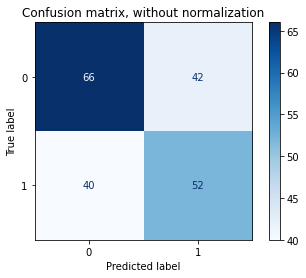

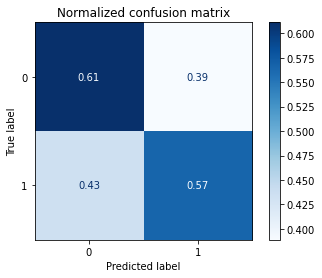

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


print('\n\033[1m\033[94m Confusion Matrix on Naive Bayes \033[0m\n')
prediction, a, b = train_model_others(naive_bayes.MultinomialNB(), X, y, Xt, yt)
print(classification_report(yt, prediction))

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

print('\n\n\033[1m\033[94m False Positive in Naive Bayes \033[0m\n')
for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_bayes.MultinomialNB().fit(X,y), Xt, yt,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    # print(title)
    # print(disp.confusion_matrix)
    if(normalize == None):
      print("Without Normalization: ", disp.confusion_matrix[0][1], "\n")
    else:
      print("With Normalization: ", disp.confusion_matrix[0][1], "\n")

print('\n\n\033[1m\033[94m Confusion Matrix of Naive Bayes \033[0m\n')
plt.show()

# **<font color='darkblue'> 7. Cross Validation </font>**

We will validate our all models using below Methods:


*   2-Fold Cross Validation
*   5-Fold Cross Validation
*   10-Fold Cross Validation
*   Jackknif Cross Validation



### **<font color='mediumblue'> 7.1 Create Validation Methods </font>**

#### **Utility Components**

Utility variables initialized to keep the Accuracy for each model and Results of Sample outputs.

*   ***plot_bar_chart():*** This function draws Bar Chart of models'accuracy based on Validation output for K-Based cross validation



In [ ]:
models_for_validation = ["MLNN", "Linear Regression", "KNN", "SVM", "Logistic Regression", "Bagging (Random Forest)", "Boosting (XGB Classifier)", "Naive Bayes"]

# Draw the bar chart
def plot_bar_chart(data):
  x = np.arange(data.shape[0])
  dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
  d = 1./(data.shape[1]+2.)

  y_colors = ['#161692', '#33A8FF', '#33FCFF', '#33DDFF', '#5BF3AE', '#F0DA22', '#44CEE7', '#0EC5FB', '#0EFBD0', '#74ECE4', '#557DB3']
  # y_colors = ['#1726A0', '#33A8FF', '#74ECE4', '#E7D41A', '#557DB3', '#4FE091', '#6F79CF', '#33FCFF', '#44CEE7', '#33A8FF', '#698BEB', '#8DA0D5', '#0F80DA', '#60ADEA', '#14A0BC', '#0F9160', '#07BFBC', '#71B8CF', '#16A8D7']

  x_ticklabels = ['MLNN', 'LR', 'KNN', 'SVC', 'LogR', 'RF', 'XGB', 'NB']

  fig, ax=plt.subplots()
  for i in range(data.shape[1]):
      ax.bar(x+dx[i],data[:,i], width=d, color=y_colors[i%10], tick_label=x_ticklabels)

  plt.xlabel("Model")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

*   ***plot_jackkife_bar_chart():*** This function draws ***Bar Chart*** of models'accuracy based on Validation output only for Jackknife method.

    target_model_name: this is the label toward x-axis, the target model name (i.e MLNN, KNN, rtc.)



In [ ]:
def plot_jackkife_bar_chart(data, target_model_name):

  y_colors = ['#161692', '#33A8FF', '#33FCFF', '#33DDFF', '#5BF3AE', '#F0DA22', '#44CEE7', '#0EC5FB', '#0EFBD0', '#74ECE4', '#557DB3']

  x=range(len(data))
  plt.figure(figsize=(7, 5)) 
  plt.bar(x, [val for val in data], align='center', width=0.5, color=y_colors )

  plt.xlabel(target_model_name)
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

*   ***plot_jackkife_line_chart():*** This function draws ***Line Chart*** of models'accuracy based on Validation output only for Jackknife method.

    target_model_name: this is the label toward x-axis, the target model name (i.e MLNN, KNN, rtc.)



In [ ]:
def plot_jackkife_line_chart(data, target_model_name):

  x=range(len(data))

  if(target_model_name == models_for_validation[7]):
    plt.figure(figsize=(20, 5))
  else:
    plt.figure(figsize=(7,5))

  plt.plot(x, [val for val in data], color='#33A8FF')

  plt.xlabel(target_model_name)
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.show()

#### **KFold Cross Validation Menthods**

In [ ]:
def kfold_cross_validation(k_value):

  # List Variable to keep the accuracy value in each fold for each Model
  MLNN_accuracy, Linearregression_accuracy, knn_accuracy, svc_accuracy, LogisticRegression_accuracy = [], [], [], [], []
  RandomForest_accuracy, XGBClassifier_accuracy, NaiveBays_accuracy = [], [], []

  # Use KFold library to apply the method on our system
  kf = KFold(n_splits=k_value,shuffle=False)
  kf.split(X)

  for train_index, test_index in kf.split(X):

      # Split train-test
      X_val_train, X_val_test = X[train_index], X[test_index]
      y_val_train, y_val_test = y[train_index], y[test_index]

      user_input_preds = []

      # Train our models one by one with the splited train-test data and get accuracy
      prediction, weights = train_model_mlnn(X_val_train, y_val_train, X_val_test, y_val_test, False)
      MLNN_accuracy.append(accuracy_score(y_val_test, prediction))

      prediction, accuracy, user_input_preds = train_model_linear_regression(X_val_train, y_val_train, X_val_test, y_val_test)
      Linearregression_accuracy.append(accuracy_score(y_val_test, prediction))

      prediction, accuracy, user_input_preds = train_model_others(KNeighborsRegressor(n_neighbors=5), X_val_train, y_val_train, X_val_test, y_val_test)
      knn_accuracy.append(accuracy_score(y_val_test, prediction))

      prediction, accuracy, user_input_preds = train_model_others(svm.SVC(), X_val_train, y_val_train, X_val_test, y_val_test)
      svc_accuracy.append(accuracy_score(y_val_test, prediction))

      prediction, accuracy, user_input_preds = train_model_others(linear_model.LogisticRegression(), X_val_train, y_val_train, X_val_test, y_val_test)
      LogisticRegression_accuracy.append(accuracy_score(y_val_test, prediction))

      prediction, accuracy, user_input_preds = train_model_others(ensemble.RandomForestClassifier(), X_val_train, y_val_train, X_val_test, y_val_test)
      RandomForest_accuracy.append(accuracy_score(y_val_test, prediction))

      prediction, accuracy, user_input_preds = train_model_others(xgboost.XGBClassifier(), X_val_train, y_val_train, X_val_test, y_val_test)
      XGBClassifier_accuracy.append(accuracy_score(y_val_test, prediction))
    
      prediction, accuracy, user_input_preds = train_model_others(naive_bayes.MultinomialNB(), X_val_train, y_val_train, X_val_test, y_val_test)
      NaiveBays_accuracy.append(accuracy_score(y_val_test, prediction))


  print(MLNN_accuracy, Linearregression_accuracy, knn_accuracy, svc_accuracy, LogisticRegression_accuracy, RandomForest_accuracy, XGBClassifier_accuracy, NaiveBays_accuracy, "\n")
  return MLNN_accuracy, Linearregression_accuracy, knn_accuracy, svc_accuracy, LogisticRegression_accuracy, RandomForest_accuracy, XGBClassifier_accuracy, NaiveBays_accuracy

#### **Jackknif Cross Validation Menthods**

As this method acts as destructive on for large dataset due to its processing time, We will have to **reduce "max_data"** value to execute this

In [ ]:
def jackknife_cross_validation(target_model):

  jackknife_accuracy = []

  X_symptoms = symptoms_array.astype(np.int)
  y_label = labels_array.astype(np.int)

  looc = LeaveOneOut()
  looc.get_n_splits(X_symptoms)

  for train_index, test_index in looc.split(X_symptoms):
    X_val_train, X_val_test = X_symptoms[train_index], X_symptoms[test_index]
    y_val_train, y_val_test = y_label[train_index], y_label[test_index]

    user_input_preds = []

    if (target_model == models_for_validation[0]):
      prediction, weights = train_model_mlnn(X_val_train, y_val_train, X_val_test, y_val_test, False)
      jackknife_accuracy.append(accuracy_score(y_val_test, prediction))

    elif (target_model == models_for_validation[1]):
      prediction, accuracy, user_input_preds = train_model_linear_regression(X_val_train, y_val_train, X_val_test, y_val_test)
      jackknife_accuracy.append(accuracy_score(y_val_test, prediction))

    elif (target_model == models_for_validation[2]):
      prediction, accuracy, user_input_preds = train_model_others(KNeighborsRegressor(n_neighbors=5), X_val_train, y_val_train, X_val_test, y_val_test)
      jackknife_accuracy.append(accuracy_score(y_val_test, prediction))

    elif (target_model == models_for_validation[3]):
      prediction, accuracy, user_input_preds = train_model_others(svm.SVC(), X_val_train, y_val_train, X_val_test, y_val_test)
      jackknife_accuracy.append(accuracy_score(y_val_test, prediction))

    elif (target_model == models_for_validation[4]):
      prediction, accuracy, user_input_preds = train_model_others(linear_model.LogisticRegression(), X_val_train, y_val_train, X_val_test, y_val_test)
      jackknife_accuracy.append(accuracy_score(y_val_test, prediction))

    elif (target_model == models_for_validation[5]):
      prediction, accuracy, user_input_preds = train_model_others(ensemble.RandomForestClassifier(), X_val_train, y_val_train, X_val_test, y_val_test)
      jackknife_accuracy.append(accuracy_score(y_val_test, prediction))

    elif (target_model == models_for_validation[6]):
      prediction, accuracy, user_input_preds = train_model_others(xgboost.XGBClassifier(), X_val_train, y_val_train, X_val_test, y_val_test)
      jackknife_accuracy.append(accuracy_score(y_val_test, prediction))
  
    elif (target_model == models_for_validation[7]):
      prediction, accuracy, user_input_preds = train_model_others(naive_bayes.MultinomialNB(), X_val_train, y_val_train, X_val_test, y_val_test)
      jackknife_accuracy.append(accuracy_score(y_val_test, prediction))

  print("\n", target_model, " Accuracy: \n", jackknife_accuracy, "\n")
  return jackknife_accuracy

### **<font color='mediumblue'> 7.2 Execute Validation on All Models </font>**
 
Apply Validation Methods for all Models and check accuracy:


*   2-Fold Cross Validation
*   5-Fold Cross Validation
*   10-Fold Cross Validation
*   Jackknife Cross Validation




 Naive Bayes  Accuracy: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

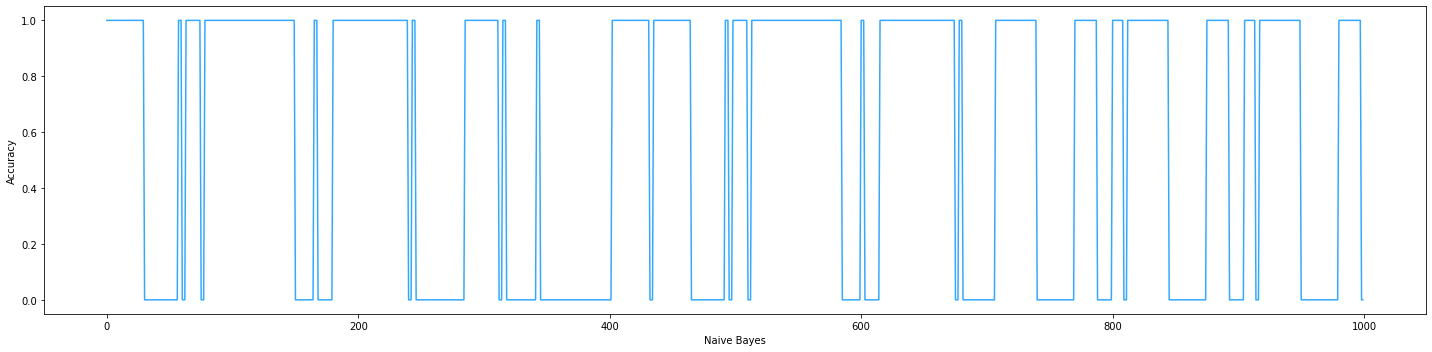

In [ ]:
def execute_validation_for_all_models():

  # print('\n\033[1m\033[94m 2-Fold Validation Result \033[0m\n')
  # data = np.array(kfold_cross_validation(2))
  # plot_bar_chart(data)

  # print('\n\033[1m\033[94m 5-Fold Validation Result \033[0m\n')
  # data = np.array(kfold_cross_validation(5))
  # plot_bar_chart(data)

  # print('\n\033[1m\033[94m 10-Fold Validation Result \033[0m\n')
  # data = np.array(kfold_cross_validation(10))
  # plot_bar_chart(data)

  # print('\n\033[1m\033[94m Jackknife Validation Result \033[0m\n')
  # data = np.array(jackknife_cross_validation(models_for_validation[0]))
  # plot_jackkife_line_chart(data, models_for_validation[0])

  # data = np.array(jackknife_cross_validation(models_for_validation[1]))
  # plot_jackkife_line_chart(data, models_for_validation[1])

  # data = np.array(jackknife_cross_validation(models_for_validation[2]))
  # plot_jackkife_line_chart(data, models_for_validation[2])

  # data = np.array(jackknife_cross_validation(models_for_validation[3]))
  # plot_jackkife_line_chart(data, models_for_validation[3])

  # data = np.array(jackknife_cross_validation(models_for_validation[4]))
  # plot_jackkife_line_chart(data, models_for_validation[4])

  # data = np.array(jackknife_cross_validation(models_for_validation[5]))
  # plot_jackkife_line_chart(data, models_for_validation[5])

  # data = np.array(jackknife_cross_validation(models_for_validation[6]))
  # plot_jackkife_line_chart(data, models_for_validation[6])

  data = np.array(jackknife_cross_validation(models_for_validation[7]))
  plot_jackkife_line_chart(data, models_for_validation[7])

# Execution Starts From Here
execute_validation_for_all_models()